In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [2]:
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [6]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

In [7]:
!pip install tensorflow[and-cuda]


  Obtaining dependency information for nvidia-cublas-cu12==12.3.4.1 from https://files.pythonhosted.org/packages/45/c8/ce94cc3875f0b2f9fe051527e42d09f79c173f8cf94f9a1863d3c586442a/nvidia_cublas_cu12-12.3.4.1-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for nvidia-cuda-cupti-cu12==12.3.101 from https://files.pythonhosted.org/packages/92/a7/9d8a4b6dba9788fd7667cb2fc8f282e5ee9b23d3a521ec5e52658aa22291/nvidia_cuda_cupti_cu12-12.3.101-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for nvidia-cuda-nvcc-cu12==12.3.107 from https://files.pythonhosted.org/packages/af/49/8f40bfa0bef5da26549dbae6df2112c7dbc69a395d784f320711ff024823/nvidia_cuda_nvcc_cu12-12.3.107-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for nvidia-cuda-nvrtc-cu12==12.3.107 from https://files.pythonhosted.org/packages/2e/e9/d7105d983df9164c59a16907900f5af891d95e087d3d830dcdd696ea374e/nvidia_cuda_nvrtc_cu12-12.3.107-py3-none-win_amd64.whl.metadata
  Obtaining depen

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [10]:
from sklearn.metrics import classification_report

In [11]:
data_dir = 'C:/Users/justi/Downloads/Sugarcane-Leaf-Disease-Detection-main/Sugarcane-Leaf-Disease-Detection-main/dataset'
categories = os.listdir(data_dir)

In [12]:
categories=sorted(categories)
print(categories)

['Healthy', 'RedRot', 'RedRust']


In [13]:
labels=[i for i in range(len(categories))]
labels

[0, 1, 2]

#### Making a dictionary with Classes as Keys and Indices as Values

In [14]:
label_dict=dict(zip(categories, labels))
label_dict

{'Healthy': 0, 'RedRot': 1, 'RedRust': 2}

In [15]:
data_list=[] #data_list- storing the images
labels_list=[] #label_list - storing the class labels

In [16]:
data1="C:/Users/justi/Downloads/Sugarcane-Leaf-Disease-Detection-main/Sugarcane-Leaf-Disease-Detection-main/dataset/Healthy"
data2="C:/Users/justi/Downloads/Sugarcane-Leaf-Disease-Detection-main/Sugarcane-Leaf-Disease-Detection-main/dataset/RedRot"
data3="C:/Users/justi/Downloads/Sugarcane-Leaf-Disease-Detection-main/Sugarcane-Leaf-Disease-Detection-main/dataset/RedRust"
count_healthy=0
count_redrot=0
count_redrust=0

In [17]:
for i in os.listdir(data1):
        img_path=os.path.join(data1, i)
        count_healthy=count_healthy+1

In [18]:
for i in os.listdir(data2):
        img_path=os.path.join(data2, i)
        count_redrot=count_redrot+1

In [19]:
for i in os.listdir(data3):
        img_path=os.path.join(data3, i)
        count_redrust=count_redrust+1

In [20]:
count_healthy,count_redrot,count_redrust

(75, 74, 75)

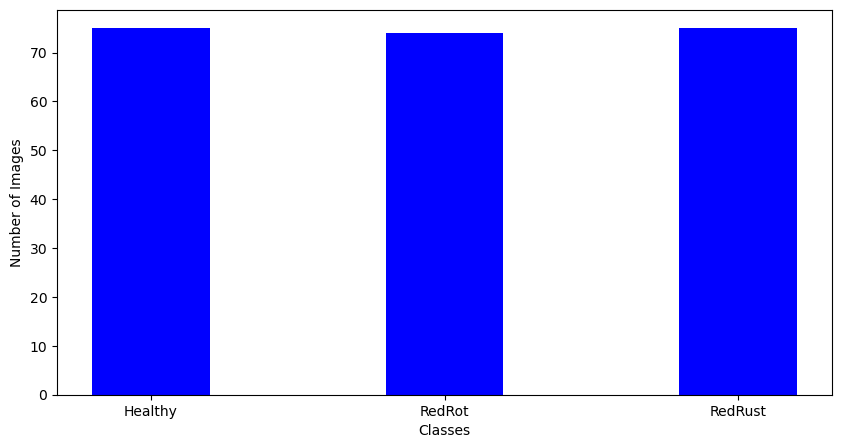

In [21]:
fig = plt.figure(figsize = (10, 5))
classes=["Healthy","RedRot", "RedRust"]
values=[count_healthy,count_redrot,count_redrust]
#creating the bar plot
plt.bar(classes, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()

In [22]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

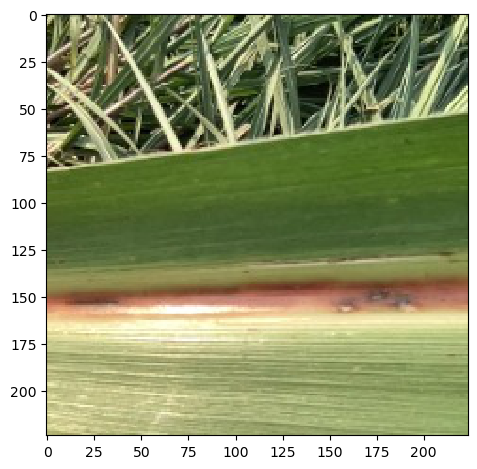

In [23]:
og_image = imread(data_dir+'/RedRot/0.jpg')
imshow(og_image);

In [24]:
def multi_convolver(image, kernel, iterations):
    for i in range(iterations):
        image = convolve2d(image, kernel, 'same', boundary = 'fill',
                           fillvalue = 0)
    return image

In [25]:
def convolver_rgb(image, kernel, iterations = 1):
    img_yuv = rgb2yuv(image)   
    img_yuv[:,:,0] = multi_convolver(img_yuv[:,:,0], kernel, 
                                     iterations)
    final_image = yuv2rgb(img_yuv)
    return final_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


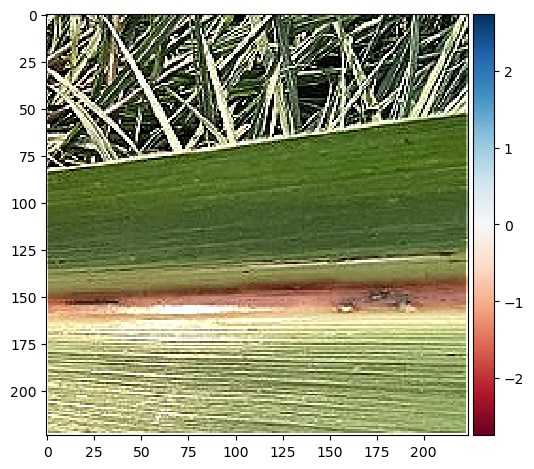

In [26]:
final_image = convolver_rgb(og_image, sharpen, iterations = 1)
imshow(final_image);

#### Image Preprocessing
1.   Resizing to 224,224
2.   Sharpening



In [27]:
from PIL import Image
for i in categories:
    folder_path=os.path.join(data_dir, i) #path to each disease folder
    img_names=os.listdir(folder_path)   #all images in each disease folder
    for img_name in img_names:
        img_path=os.path.join(folder_path, img_name)
        if(img_path=='C:/Users/justi/Downloads/Sugarcane-Leaf-Disease-Detection-main/Sugarcane-Leaf-Disease-Detection-main/dataset/RedRot' or img_path=='C:/Users/justi/Downloads/Sugarcane-Leaf-Disease-Detection-main/Sugarcane-Leaf-Disease-Detection-main/dataset/Healthy' or img_path=='C:/Users/justi/Downloads/Sugarcane-Leaf-Disease-Detection-main/Sugarcane-Leaf-Disease-Detection-main/dataset/RedRust'):
          continue
        img = Image.open(img_path)
        img = img.resize((224,224))
        img = np.array(img)
        img = convolver_rgb(img, sharpen, iterations = 1)
        data_list.append(img)
        labels_list.append(label_dict[i])

In [28]:
data_list[0].shape

(224, 224, 3)

In [29]:
lb = LabelEncoder()
labels_list = lb.fit_transform(labels_list)
labels_list = to_categorical(labels_list)

In [30]:
data = np.array(data_list)
labels = np.array(labels_list)
print("Done")
print(data.shape)

Done
(224, 224, 224, 3)


#### Visualizing Images in the Dataset after Preprocessing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

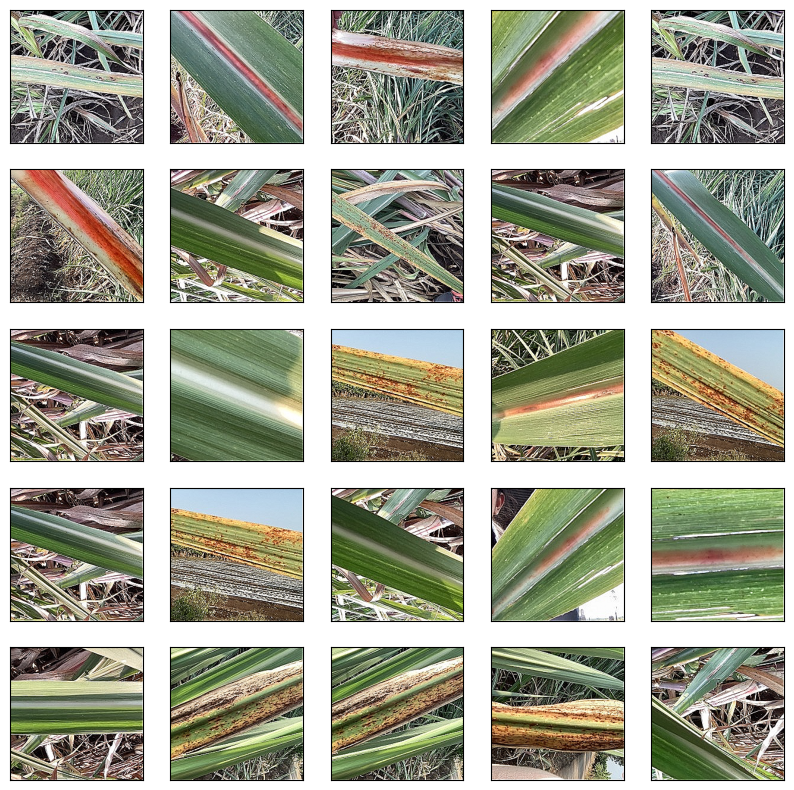

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[np.random.randint(224)], cmap=plt.cm.binary)
    
plt.show()

#### Image Augmentation

In [33]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

#### Splitting Dataset into Train and Test Sets

In [34]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

In [35]:
print( trainX.shape, testX.shape, trainY.shape, testY.shape)

(179, 224, 224, 3) (45, 224, 224, 3) (179, 3) (45, 3)


#### The model

In [36]:
from keras.applications.densenet import DenseNet201
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense ,Dropout
from keras.layers import Input

In [37]:
base_model = DenseNet201(include_top=False,
                         input_shape=(224,224,3),
                         weights='imagenet',
                         pooling="avg"
                     )

74836368/74836368 [==============================] - 21s 0us/step


In [38]:
from tensorflow.keras.regularizers import l2 

In [39]:
base_model.trainable = False 
image_input = Input(shape=(224, 224, 3))

x = base_model(image_input,training = False)

x = Dense(256,activation = "relu")(x)
x = Dropout(0.2)(x)

x = Dense(128,activation = "relu")(x)
x = Dropout(0.2)(x)

image_output = Dense(3,kernel_regularizer=l2(0.01),activation="softmax")(x) #output layer
#kernel Regulariser- SVM

model = Model(image_input,image_output)
model.compile(optimizer="adam",loss="squared_hinge",metrics=["accuracy"])
#loss function is square hinged- SVM

In [40]:
from tensorflow.keras.utils import plot_model

In [42]:
!pip install pydot

  Obtaining dependency information for pydot from https://files.pythonhosted.org/packages/7f/90/c9b51f3cdff89cd8f93382060330f43d1af098a6624cff439e700791e922/pydot-2.0.0-py3-none-any.whl.metadata


In [43]:
!pip install graphviz

  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------------------------- ------------- 30.7/47.1 kB 435.7 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 472.9 kB/s eta 0:00:00


In [46]:
from tensorflow.keras.utils import plot_model

In [49]:
!pip install pydotplus

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     -- ---------------------------------- 20.5/278.7 kB 330.3 kB/s eta 0:00:01
     -------- ---------------------------- 61.4/278.7 kB 656.4 kB/s eta 0:00:01
     -------------------------- ----------- 194.6/278.7 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 278.7/278.7 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24578 sha256=53088edf392ceb9f610f4f0eb463a1318615c1191202d35db149f59e554a718f
  Stored in directory: c:\users\justi\appdata\local\pip\cache\wheels\bd\ce\e8\ff9d9c699514922f57caa22fbd55b0a32761114b4c4acc9e03
Successfully built pydotplus


In [50]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [53]:
import pydot
import pydotplus
from pydotplus import graphviz

In [54]:
from tensorflow.keras.utils import plot_model

In [55]:
plot_model(base_model, to_file = 'Densenet.png', show_shapes = True, show_layer_names = True) 

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


#### Training the Model

In [56]:
BS=32
EPOCHS=10

In [57]:
history = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS) 

Epoch 1/10
5/5 [==============================] - 45s 7s/step - loss: 1.3216 - accuracy: 0.4422 - val_loss: 1.0404 - val_accuracy: 0.8667
Epoch 2/10
5/5 [==============================] - 37s 8s/step - loss: 1.0705 - accuracy: 0.7125 - val_loss: 0.8800 - val_accuracy: 0.9111
Epoch 3/10
5/5 [==============================] - 42s 9s/step - loss: 0.8591 - accuracy: 0.9524 - val_loss: 0.8125 - val_accuracy: 0.9556
Epoch 4/10
5/5 [==============================] - 44s 9s/step - loss: 0.8203 - accuracy: 0.9524 - val_loss: 0.7955 - val_accuracy: 0.9556
Epoch 5/10
5/5 [==============================] - 61s 14s/step - loss: 0.7905 - accuracy: 0.9524 - val_loss: 0.7798 - val_accuracy: 0.9556
Epoch 6/10
5/5 [==============================] - 34s 7s/step - loss: 0.7606 - accuracy: 0.9932 - val_loss: 0.7758 - val_accuracy: 0.9556
Epoch 7/10
5/5 [==============================] - 42s 9s/step - loss: 0.7465 - accuracy: 0.9812 - val_loss: 0.7677 - val_accuracy: 0.9556
Epoch 8/10
5/5 [=================

In [59]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs))

[INFO] evaluating network...
2/2 [==============================] - 10s 2s/step
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



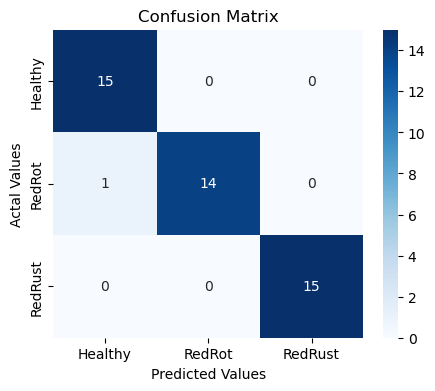

In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(testY.argmax(axis=1), predIdxs)


cm_df = pd.DataFrame(cm,
                     index = ['Healthy','RedRot','RedRust'], 
                     columns = ['Healthy','RedRot','RedRust'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

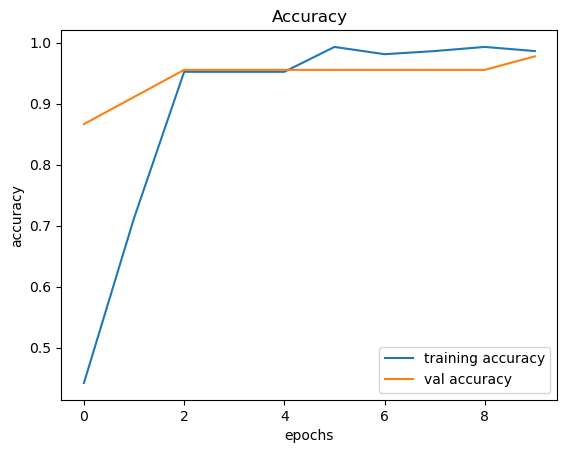

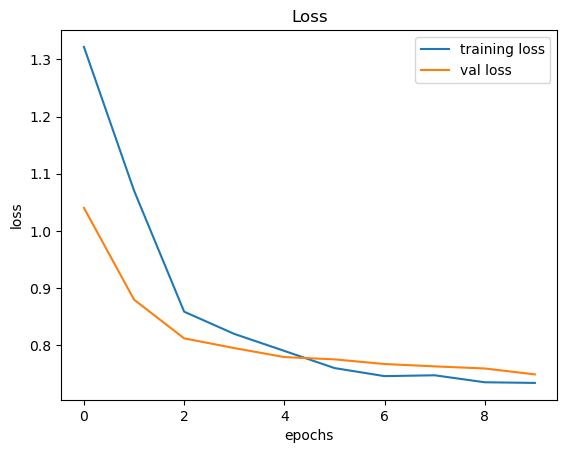

In [61]:
import matplotlib.pyplot as plt
plt.figure(0)

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [75]:
model.save("Model1.h5")
